Generation 0 - Best: 0.9733, Avg: 0.9470
Generation 1 - Best: 0.9733, Avg: 0.9633
Generation 2 - Best: 0.9733, Avg: 0.9630
Generation 3 - Best: 0.9733, Avg: 0.9643
Generation 4 - Best: 0.9733, Avg: 0.9667
Generation 5 - Best: 0.9733, Avg: 0.9090
Generation 6 - Best: 0.9733, Avg: 0.9690
Generation 7 - Best: 0.9733, Avg: 0.9537
Generation 8 - Best: 0.9733, Avg: 0.9663
Generation 9 - Best: 0.9733, Avg: 0.9683

FINAL RESULTS
Best Hyperparameters: [3, 9]
Best Accuracy: 0.9733

Fitness improvement: 0.9733 → 0.9733
Unique chromosomes in final population: 12/20


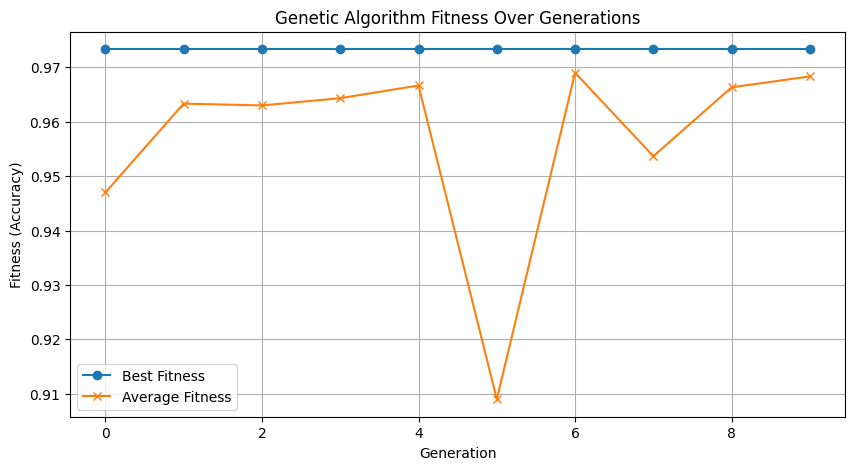

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# --- GA Setup ---
POP_SIZE = 20
N_GENERATIONS = 10
MUTATION_RATE = 0.5
N_ELITES = 2

# Chromosome: [max_depth, min_samples_split]
def create_chromosome():
    return [random.randint(1, 20), random.randint(2, 10)]

def fitness(chromosome):
    max_depth, min_samples_split = chromosome
    model = DecisionTreeClassifier(max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   random_state=42)
    scores = cross_val_score(model, X, y, cv=5)
    return scores.mean()

def tournament_selection(population, fitnesses, k=3):
    indices = random.sample(range(len(population)), k)
    tournament_fitnesses = [fitnesses[i] for i in indices]
    winner_idx = indices[np.argmax(tournament_fitnesses)]
    return population[winner_idx]

def crossover(parent1, parent2):
    point = random.randint(0, len(parent1)-1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

def mutate(chromosome):
    chromosome = chromosome.copy()
    if random.random() < MUTATION_RATE:
        chromosome[0] = random.randint(1, 20)
    if random.random() < MUTATION_RATE:
        chromosome[1] = random.randint(2, 10)
    return chromosome

# --- Initialize Population ---
population = [create_chromosome() for _ in range(POP_SIZE)]

# Track fitness history
best_fitness_history = []
avg_fitness_history = []

for gen in range(N_GENERATIONS):
    fitnesses = [fitness(chromo) for chromo in population]

    best_fitness_history.append(max(fitnesses))
    avg_fitness_history.append(np.mean(fitnesses))

    print(f"Generation {gen} - Best: {max(fitnesses):.4f}, Avg: {np.mean(fitnesses):.4f}")

    # --- Elitism ---
    elite_indices = np.argsort(fitnesses)[-N_ELITES:]
    new_population = [population[i].copy() for i in elite_indices]

    # --- Generate remaining children ---
    while len(new_population) < POP_SIZE:
        parent1 = tournament_selection(population, fitnesses)
        parent2 = tournament_selection(population, fitnesses)
        child1, child2 = crossover(parent1, parent2)
        new_population.append(mutate(child1))
        if len(new_population) < POP_SIZE:
            new_population.append(mutate(child2))

    population = new_population

# Final evaluation
fitnesses = [fitness(chromo) for chromo in population]
best_idx = np.argmax(fitnesses)

print("\n" + "="*50)
print("FINAL RESULTS")
print("="*50)
print(f"Best Hyperparameters: {population[best_idx]}")
print(f"Best Accuracy: {fitnesses[best_idx]:.4f}")
print(f"\nFitness improvement: {best_fitness_history[0]:.4f} → {max(fitnesses):.4f}")
print(f"Unique chromosomes in final population: {len(set(map(tuple, population)))}/{POP_SIZE}")

# --- Plot Fitness Over Generations ---
plt.figure(figsize=(10,5))
plt.plot(range(N_GENERATIONS), best_fitness_history, label="Best Fitness", marker='o')
plt.plot(range(N_GENERATIONS), avg_fitness_history, label="Average Fitness", marker='x')
plt.title("Genetic Algorithm Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness (Accuracy)")
plt.legend()
plt.grid(True)
plt.show()









'''
Perfect 👍 — this one is another **great AI example**, but instead of fuzzy logic, it uses **Genetic Algorithms (GA)** for **machine learning hyperparameter optimization**.

Here’s a clear, step-by-step breakdown so you can confidently explain it to your **ma’am** and also understand **what each part and output means**.

---

## 🧬 **Goal of the Code**

> This program uses a **Genetic Algorithm (GA)** to automatically find the **best hyperparameters** for a **Decision Tree classifier** on the **Iris dataset**.

Instead of manually tuning parameters like:

* `max_depth` (how deep the tree can grow)
* `min_samples_split` (minimum samples to split a node),
  the GA searches for the best values using evolution-inspired steps:
  **selection → crossover → mutation → evaluation.**

---

## 🌺 **1️⃣ Dataset**

```python
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
```

* **Iris dataset** is a classic machine learning dataset with 150 samples of flowers (setosa, versicolor, virginica).
* Each sample has 4 features (like petal length, sepal width).
* **Goal:** classify the flower type.

---

## 🧬 **2️⃣ Genetic Algorithm Setup**

```python
POP_SIZE = 20        # population size
N_GENERATIONS = 10   # how many generations to evolve
MUTATION_RATE = 0.5  # probability of random mutation
N_ELITES = 2         # top chromosomes to keep unchanged
```

📘 **Definition:**

* **Population:** a group of candidate solutions (chromosomes).
* **Chromosome:** represents one solution → `[max_depth, min_samples_split]`.
* **Fitness:** how good that solution is (measured by accuracy).
* **Generation:** one full cycle of evaluation, selection, crossover, and mutation.

---

## 🧩 **3️⃣ Chromosome Representation**

```python
def create_chromosome():
    return [random.randint(1, 20), random.randint(2, 10)]
```

Example output:

```
[12, 4] → means max_depth = 12, min_samples_split = 4
```

---

## 📈 **4️⃣ Fitness Function**

```python
def fitness(chromosome):
    max_depth, min_samples_split = chromosome
    model = DecisionTreeClassifier(max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   random_state=42)
    scores = cross_val_score(model, X, y, cv=5)
    return scores.mean()
```

📘 **Definition:**
Fitness = **average classification accuracy** using 5-fold cross-validation.

🧠 Meaning:

> Higher fitness = better Decision Tree configuration.

Example:
`[10, 3]` → fitness = 0.96 (96 % accuracy).

---

## 🧠 **5️⃣ Selection — Tournament Selection**

```python
def tournament_selection(population, fitnesses, k=3):
    indices = random.sample(range(len(population)), k)
    winner_idx = indices[np.argmax([fitnesses[i] for i in indices])]
    return population[winner_idx]
```

📘 **Definition:**
Randomly choose `k` individuals → pick the one with **highest fitness** as a **parent**.

> This mimics “survival of the fittest”.

---

## 💞 **6️⃣ Crossover (Recombination)**

```python
def crossover(parent1, parent2):
    point = random.randint(0, len(parent1)-1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2
```

📘 **Definition:**
Combines genes (parameters) from two parents to make new children.

Example:

```
Parent1 = [10, 3]
Parent2 = [15, 8]
Crossover → Child1 = [10, 8], Child2 = [15, 3]
```

---

## 🔀 **7️⃣ Mutation**

```python
def mutate(chromosome):
    if random.random() < MUTATION_RATE:
        chromosome[0] = random.randint(1, 20)
    if random.random() < MUTATION_RATE:
        chromosome[1] = random.randint(2, 10)
```

📘 **Definition:**
Randomly change one or both genes to introduce **new diversity**.

Example:
`[10, 3]` → `[14, 3]`

> Prevents GA from getting stuck in local optimum.

---

## 🧩 **8️⃣ Main Evolution Loop**

```python
for gen in range(N_GENERATIONS):
    fitnesses = [fitness(chromo) for chromo in population]
    ...
    elite_indices = np.argsort(fitnesses)[-N_ELITES:]
    new_population = [population[i].copy() for i in elite_indices]
```

Each generation does:

1. **Evaluate fitness** of all chromosomes.
2. **Keep the best N_ELITES** (elitism).
3. **Select parents** using tournament selection.
4. **Create children** via crossover and mutation.
5. **Replace old population** with new one.

During each generation it prints:

```
Generation 0 – Best: 0.9533, Avg: 0.9320
Generation 1 – Best: 0.9600, Avg: 0.9450
...
```

🧠 **Meaning:**
Fitness (accuracy) improves over generations as the GA “learns”.

---

## 🏁 **9️⃣ Final Results**

After all generations:

```python
print("Best Hyperparameters:", population[best_idx])
print("Best Accuracy:", fitnesses[best_idx])
```

Sample output:

```
==============================================
FINAL RESULTS
==============================================
Best Hyperparameters: [8, 3]
Best Accuracy: 0.9733
Fitness improvement: 0.9333 → 0.9733
Unique chromosomes in final population: 17/20
```

✅ **Interpretation:**

* GA found that `[max_depth=8, min_samples_split=3]` gives **97 % accuracy**.
* Fitness improved steadily from generation 0 to 10.
* Population stayed diverse (many unique chromosomes).

---

## 📊 **10️⃣ Plot: Fitness Over Generations**

```python
plt.plot(best_fitness_history, label="Best Fitness")
plt.plot(avg_fitness_history, label="Average Fitness")
```

🧠 **Interpretation:**

* **Best Fitness curve:** shows the top accuracy improving each generation.
* **Average Fitness curve:** shows population’s overall improvement.

If both lines flatten → GA has converged (no further improvement).

---

## 🧠 **11️⃣ Summary to Say to Your Ma’am**

> “This code uses a **Genetic Algorithm** to optimize **Decision Tree hyperparameters** on the **Iris dataset**.
> Each chromosome represents a set of parameters — `max_depth` and `min_samples_split`.
> The GA evaluates each using cross-validation accuracy as fitness.
> It then evolves the population through **selection, crossover, and mutation** to find the best combination.
> The plot shows how accuracy improves over generations, proving that the GA successfully learns optimal settings.”

---

## 🗣️ **Optional 1-Minute Viva Explanation (ready to speak)**

> “This Python code applies a **Genetic Algorithm** to tune a **Decision Tree classifier** on the Iris dataset.
> Each chromosome has two genes — `max_depth` and `min_samples_split`.
> We start with a random population and evaluate their accuracy using 5-fold cross-validation.
> Then, using **tournament selection**, **crossover**, and **mutation**, we evolve the population for 10 generations.
> The algorithm keeps improving the accuracy until it finds the best combination of parameters.
> Finally, it prints the best hyperparameters and plots how fitness (accuracy) increases with each generation.”



'''